# Projeto: Séries Temporais de Consumo de Energia

In [30]:
# 1️⃣ IMPORTAR BIBLIOTECAS
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# 2️⃣ CARREGAR O DATASET
file_path = "../data/household_power_consumption.txt"

# Ler o arquivo com separador ponto-e-vírgula e cabeçalho
df = pd.read_csv(
    file_path,
    sep=";",           # separador ponto-e-vírgula
    dayfirst=True      # dia/mês/ano
)

# Combinar as colunas Date e Time em uma coluna datetime
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], dayfirst=True)

# Definir Datetime como índice
df.set_index("Datetime", inplace=True)

# Remover as colunas antigas de data e hora
df.drop(["Date", "Time"], axis=1, inplace=True)

# Mostrar primeiras linhas
df.head()

C:\Users\Ivna Façanha\AppData\Local\Temp\ipykernel_9468\3070374760.py:5: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [7]:
# Usando o método describe para exploração dos dados
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [8]:
df.isna().mean() * 100

Global_active_power      0.000000
Global_reactive_power    0.000000
Voltage                  0.000000
Global_intensity         0.000000
Sub_metering_1           0.000000
Sub_metering_2           0.000000
Sub_metering_3           1.251844
dtype: float64

In [12]:
# Tratando os dados faltantes em "Sub_metering_3"
df = df.ffill()

In [14]:
# Conferindo a limpeza
df.isna().mean() * 100

Global_active_power      0.0
Global_reactive_power    0.0
Voltage                  0.0
Global_intensity         0.0
Sub_metering_1           0.0
Sub_metering_2           0.0
Sub_metering_3           0.0
dtype: float64

In [17]:
df.index.dtype

dtype('<M8[ns]')

In [20]:
print(df.dtypes)

Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object


In [21]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [22]:
print(df.dtypes)

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


In [23]:
df.isna().mean() * 100

Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           0.000000
dtype: float64

In [24]:
# Procurar linhas com valores ausentes em alguma coluna
missing_dates = df[df.isna().any(axis=1)]

print(missing_dates.head(10))
print(f"Total de datas com valores faltantes: {missing_dates.shape[0]}")

                     Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-21 11:23:00                  NaN                    NaN      NaN   
2006-12-21 11:24:00                  NaN                    NaN      NaN   
2006-12-30 10:08:00                  NaN                    NaN      NaN   
2006-12-30 10:09:00                  NaN                    NaN      NaN   
2007-01-14 18:36:00                  NaN                    NaN      NaN   
2007-01-28 17:13:00                  NaN                    NaN      NaN   
2007-02-22 22:58:00                  NaN                    NaN      NaN   
2007-02-22 22:59:00                  NaN                    NaN      NaN   
2007-03-25 17:52:00                  NaN                    NaN      NaN   
2007-04-28 00:21:00                  NaN                    NaN      NaN   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime      

In [25]:
df = df.ffill()

In [26]:
df.isna().mean() * 100

Global_active_power      0.0
Global_reactive_power    0.0
Voltage                  0.0
Global_intensity         0.0
Sub_metering_1           0.0
Sub_metering_2           0.0
Sub_metering_3           0.0
dtype: float64

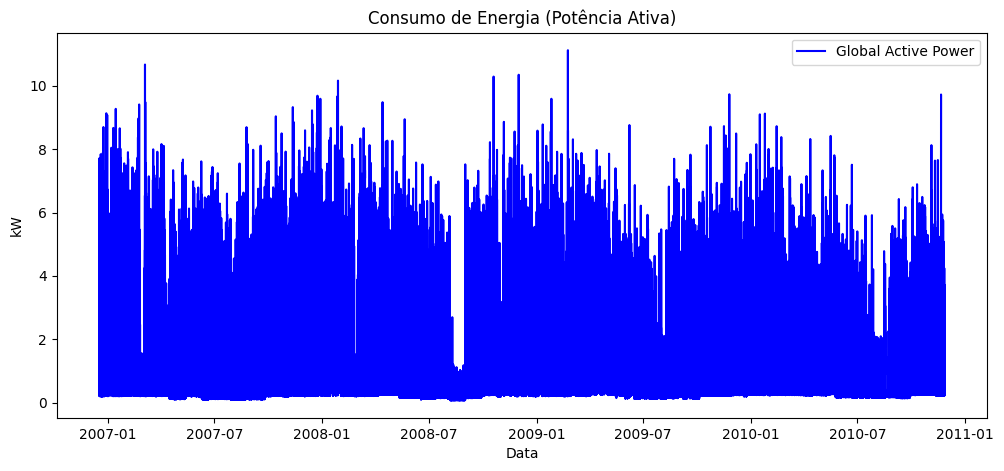

In [27]:
# VISUALIZAÇÃO
plt.figure(figsize=(12,5))
plt.plot(df.index, df["Global_active_power"], color="blue", label="Global Active Power")
plt.title("Consumo de Energia (Potência Ativa)")
plt.xlabel("Data")
plt.ylabel("kW")
plt.legend()
plt.show()

C:\Users\Ivna Façanha\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


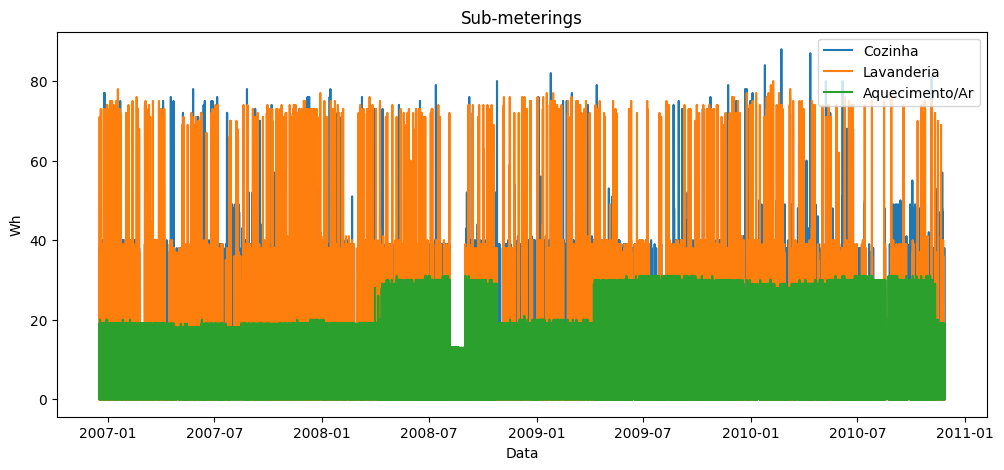

In [28]:
# Visualizar sub-meterings
plt.figure(figsize=(12,5))
plt.plot(df.index, df["Sub_metering_1"], label="Cozinha")
plt.plot(df.index, df["Sub_metering_2"], label="Lavanderia")
plt.plot(df.index, df["Sub_metering_3"], label="Aquecimento/Ar")
plt.title("Sub-meterings")
plt.xlabel("Data")
plt.ylabel("Wh")
plt.legend()
plt.show()

In [31]:
# Salvar os dados explorados e limpos em csv
df.to_csv("../data/household_power_consumption_processed.csv", index=True)

print("Dataset limpo salvo em data/household_power_consumption_processed.csv")

Dataset limpo salvo em data/household_power_consumption_processed.csv
